- In DNN the neurons/pixels are something that hold values temporarily.
- The important thing where we focus is the weights, these are the trainable in DNN and stored for inference.
- when we flatten 2D matrix to 1D matrix example in feed forward network, we loose spartial information.
- VGG / Imagenet / Resnet / Alexnet, etc all this network having input as 224x224x3
- If someone asks us the value of the neuron then only consider the input weights multiplied with the input, never consider the output one because that will be input for another layer for calculation.
- calculation of total number of weights in VGG network as given in assignment question.
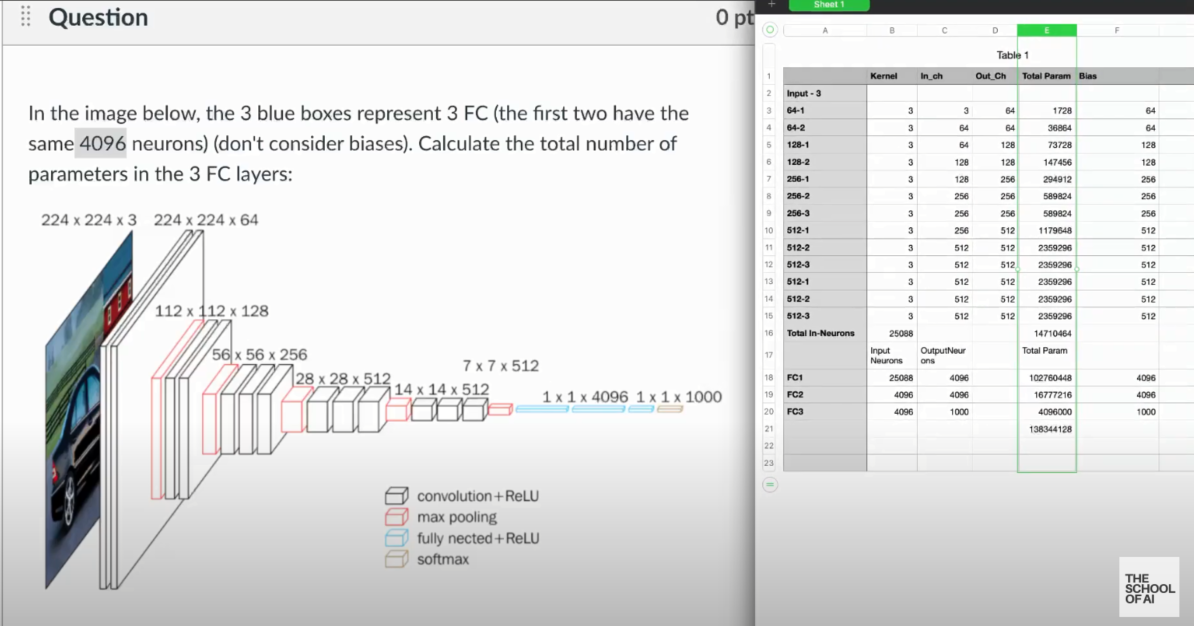
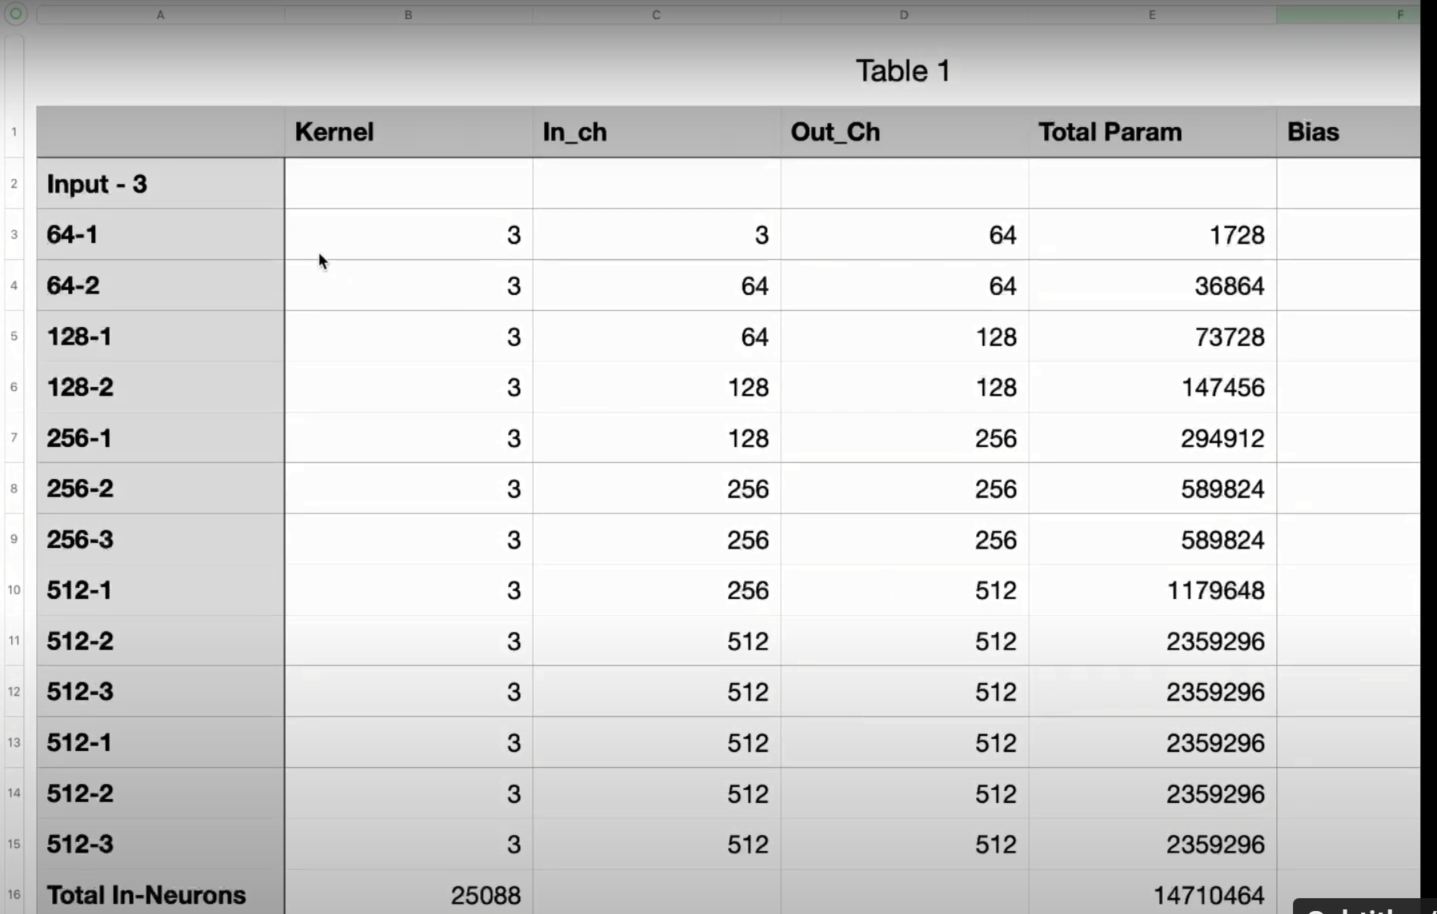
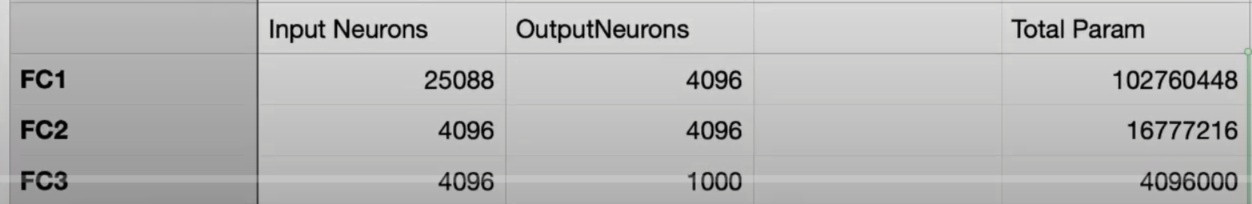
- coomplete table in one go
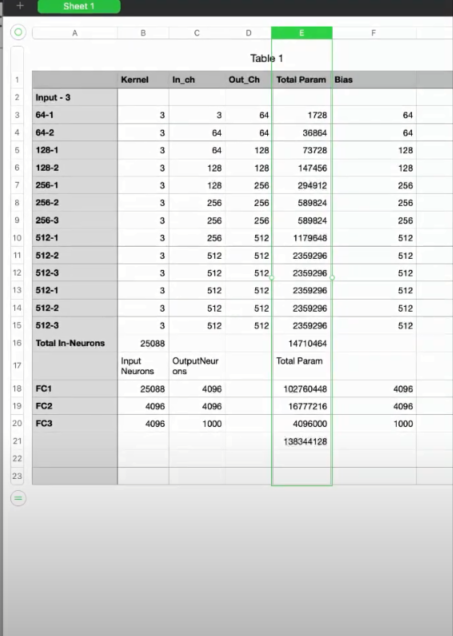

- in case of fully connected layer, it actutally lost the receptive field becuase of loss in spartial information. Hence no gain in RF for fully connected layer.
- receptive field table calculation for Vgg network
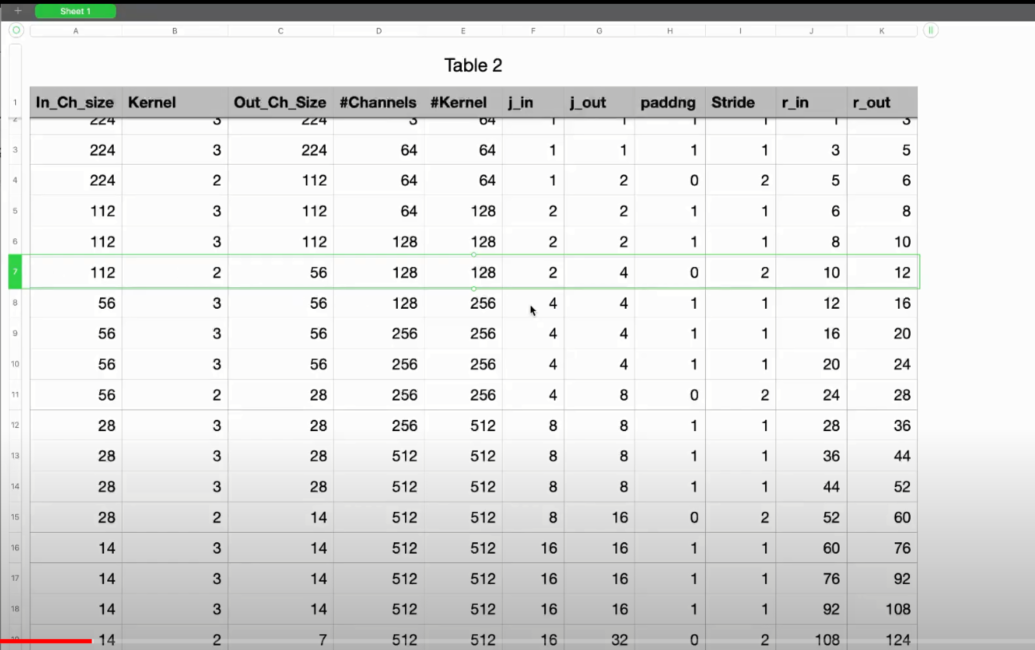

- Never apply activation function after FC convolution, example RELU should not apply after FC before sending to softmax.

# postitional embedding
- fourier transform is used to get individual signals out of a complex signal. Neural network are also very good in doing this.
- positional embeddings are combination of sin and cosine waves which in turn then extracted out by neural network.
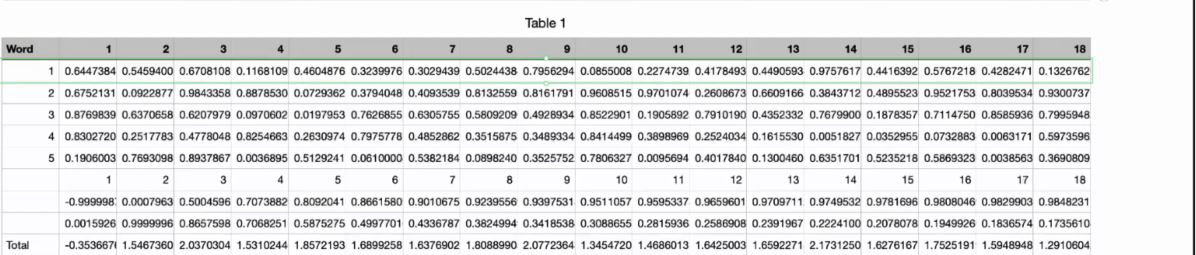

- 1X1 is actually superset of fully connected layer
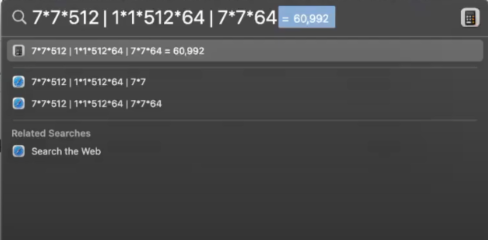
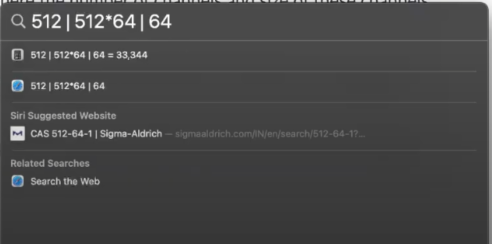
- Note: glove encoding - used before neural network started its own encoding.

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [4]:
# CUDA?
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
device

device(type='cpu')

# PyTorch 101

![Pytorch](https://miro.medium.com/max/1024/1*KKADWARPMxHb-WMxCgW_xA.png)
# Pytorch

An open source machine learning framework that accelerates the path from research prototyping to production deployment.

It is a deep learning framework and a scientific computing package.

It has several components that you'd like to be aware of (from future perspective):
* PyTorch is production ready. With **torchScript**, PyTorch provides ease-of-use and flexiblility in _eager_ mode, while seamlessly  transitioning to graph mode for speed, optimization, and functionality in C++ runtime environments.
* **TorchServe** is an easy to use tool for deploying PyTorch models at scale. It is cloud and environment agnostic and supports features such as multi-model serving, logging, metrics and the creation of RESTful endpoints for application integration.
* Optimized performance in both research and production by taking advantage of native support for asynchronous execution of collective operations and peer-to-peer communication that is accessible from Python and C++.
* PyTorch supports an end-to-end workflow from Python to deployment on iOS and Android. It extends the PyTorch API to cover common preprocessing and integration tasks needed for incorporating ML in mobile applications.
* An active community of researchers and developers have built a rich ecosystem of tools and libraries for extending PyTorch and supporting development in areas from computer vision to reinforcement learning.
* Export models in the standard **ONNX** (Open Neural Network Exchange) format for direct access to ONNX-compatible platforms, runtimes, visualizers, and more.
* The C++ frontend is a pure C++ interface to PyTorch that follows the design and architecture of the established Python frontend. It is intended to enable research in high performance, low latency and bare metal C++ applications.
* PyTorch is well supported on major cloud platforms, providing frictionless development and easy scaling through prebuilt images, large scale training on GPUs, ability to run models in a production scale environment, and more.

| **PyTorch**  | **TensorFlow**  | 
|---|---|
| Dynamic Computation Graphs  | Had to integrate Keras to add Dynamic Graphs, else static graphs  |
| Have explicit GPU and CPU controls  | 2.0 has made this slighyl easy compared to earlier  |
| More Pythonic in nature  | Steep learning curve  |
| Good Documentation | Best possible documentation |
| External tool for visualization and logging | TensorBoard |
| Lighter to work with | Large deployment dependencies |
| _Debugging is difficult_ | _Better debugging capabilities_ |


![comparison](https://miro.medium.com/max/744/1*IsaBkifkc5P7ihRA8IKQ8Q.png)

Note: In the above graph anything over 50% means more mentions for PyTorch than TensorFlow for that conference.



-- Note PyTorch supports dynamic coputation graph : which means we don't have to write for backpropagation. PyTorch take care of the same. We can query a layer, or chagne the dynamic graph and even use the skip connections.

#### PyTorch Philosophy

* Stay out of the way
* Cater to the impatient
* Promote linear code-flow
* Full interop with the Python ecosystem
* Be as fasst as anything else

#### Debugging

* PyTorch is Python Extension
* You can use any Python Debugger
* Even _print_ function works on PyTorch objects

## Why it got so popular?

To solve deep neural networks, we need to calculate derivates, and to do this computationally, deep learning frameworks use what are called **computational graphs**. 
![cgs](https://blog.paperspace.com/content/images/2019/03/full_graph.png)

PyTorch introduced **Dynamic Computational Graphs**, a first in the industry. It means that the graph is generated on the fly as the operations occur in contrast to _static graphs_ that are fully determined before actual action occur. 

Experimentation, advanced models and quick tests need Dynamic Computation Graphs as a back-end feature. 

## Scientific Computing

The scientific computing aspect of PyTorch is primarily a result of PyTorch's tensor Library and associated tensor operations

A tensor is an n-dimensional array. 

![tensor](https://res.cloudinary.com/practicaldev/image/fetch/s--VaxrSdrA--/c_limit%2Cf_auto%2Cfl_progressive%2Cq_auto%2Cw_880/https://thepracticaldev.s3.amazonaws.com/i/bp6ux6ppf5t5amwkxklq.jpg)


### Numpy
One of the most popular scientific computing package for working with Tensors is nunmpy. 
![numpy](https://res-3.cloudinary.com/crunchbase-production/image/upload/c_lpad,h_256,w_256,f_auto,q_auto:eco/gxgj1nsz0eq3rg13j7kk)

Numpy is the go-to package for nD arrays. PyTorch's tensor library mirrors numpy nD array capabilities very closely and in addition is highly interoprable with numpy. In PyTorch GPU support for tensors is inbuilt, and it is vey easy to move arrays from numpy (CPU) to GPU. 


In [9]:
!pip install torch


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import numpy as np

In [11]:
v0 = np.array(1.3)
v1 = np.array([1.,2.,3.])
v2 = np.array([[1.,2.],[4.,5.]])
print(f'v0:{v0},v1:{v1},v2{v2}')

v0:1.3,v1:[1. 2. 3.],v2[[1. 2.]
 [4. 5.]]


In [13]:
numpy_array = np.array([1,2,3,])

In [27]:
import torch

t1 = torch.Tensor(numpy_array)
# Constructor - Same a torch.FloatTensor
# Uses a default float 32 tesnor, this can be changed
# all other tensors are inherited from this Tensor class.
# always going to copy the data

In [15]:
t2 = torch.tensor(numpy_array)

# Factory Function
# going to produce a new tensor of the same type of numpy_array (whether int or float)
# doesn't share the underlying memory with Numpy.
# always need to copy data (in CPU or GPU)
# torch.tensor(data, dtype=None, device=None, requires_grad=False/True)
# highly recommended to use

In [19]:
t3 = torch.as_tensor(numpy_array)
# Factory Function
# going to produce a new tensor of the same type as that of NUmpy.
# DOES share the same underlying memory with Numpy! Changing one will change other
# can accept any python data structure including numpy arrays
# always tries to avoid a copy of the data. (send data to GPU then have to create copy)
# we have to manually calll requires_grad()
# designed for CPU

In [20]:
t4 = torch.from_numpy(numpy_array)
# Factory Function
# Produces a new tensor with the same data type
# share the underlying memory with numpy, chanfing one will change another.
# designed for CPU

In [22]:
numpy_array.dtype, t1.dtype, t2.dtype, t3.dtype, t4.type

(dtype('int32'),
 torch.float32,
 torch.int32,
 torch.int32,
 <function Tensor.type>)

In [24]:
numpy_array *= 4

In [25]:
numpy_array

array([ 4,  8, 12])

In [26]:
t1, t2, t3, t4

(tensor([1., 2., 3.]),
 tensor([1, 2, 3], dtype=torch.int32),
 tensor([ 4,  8, 12], dtype=torch.int32),
 tensor([ 4,  8, 12], dtype=torch.int32))

In [28]:
t1 *= 2 
numpy_array, t1, t2, t3, t4

(array([ 4,  8, 12]),
 tensor([ 8., 16., 24.]),
 tensor([1, 2, 3], dtype=torch.int32),
 tensor([ 4,  8, 12], dtype=torch.int32),
 tensor([ 4,  8, 12], dtype=torch.int32))

In [29]:
t2 *= 2 
numpy_array, t1, t2, t3, t4

(array([ 4,  8, 12]),
 tensor([ 8., 16., 24.]),
 tensor([2, 4, 6], dtype=torch.int32),
 tensor([ 4,  8, 12], dtype=torch.int32),
 tensor([ 4,  8, 12], dtype=torch.int32))

In [30]:
t3 *= 2 
numpy_array, t1, t2, t3, t4

(array([ 8, 16, 24]),
 tensor([ 8., 16., 24.]),
 tensor([2, 4, 6], dtype=torch.int32),
 tensor([ 8, 16, 24], dtype=torch.int32),
 tensor([ 8, 16, 24], dtype=torch.int32))

In [31]:
t4 *= 2 
numpy_array, t1, t2, t3, t4

(array([16, 32, 48]),
 tensor([ 8., 16., 24.]),
 tensor([2, 4, 6], dtype=torch.int32),
 tensor([16, 32, 48], dtype=torch.int32),
 tensor([16, 32, 48], dtype=torch.int32))

In [32]:
t5 = t4.cuda() # t5 will be on cuda but t4 not
t5.device, t4.device

AssertionError: Torch not compiled with CUDA enabled

In [33]:
t6 = t4 + t3

In [34]:
t6 = t4 + t5 # this we can't do as one is on CPU and other one is on GPU

NameError: name 't5' is not defined

In [35]:
torch.eye(2) # diagonal one
torch.zeros(3,3) # all zeros
torch.ones(2,3) # all ones
torch.rand(2,4) # to create imaginary images

tensor([[0.4564, 0.4453, 0.2038, 0.5884],
        [0.3183, 0.7993, 0.5592, 0.2918]])

In [36]:
data = torch.tensor([[1,2,3,], [4,5,6,]]) # 2-D tensor
data[1,0], data[0,0:2], data[:2,:2]

(tensor(4),
 tensor([1, 2]),
 tensor([[1, 2],
         [4, 5]]))

#### Torch.tensor attributes

| Attribute | Data Type | Description | 
|----|----|----|
|data|array_like | list, tuple, NumPy ndarray, scalar |
|dtype| torch.dtype | The tensor's data type|
|requires_grad | bool| Should autograd record operation |
|device | torch.device | Allocated on CPU or CUDA (GPU) |

torch.tensor(data, dtype=None, device=None, requires_grad=False) → Tensor


In [37]:
t = torch.as_tensor(data = [1, 2, 3], dtype=torch.float32, device='cpu', requires_grad=False)
t

# above syntax is wrong because requires grad doesn't come as an argument with as_tensor. We have to define it separately

TypeError: as_tensor() got an unexpected keyword argument 'requires_grad'

In [40]:
t = torch.as_tensor(data = [1, 2, 3], dtype=torch.float32, device='cpu')
t
t.requires_grad_()

tensor([1., 2., 3.], requires_grad=True)

In [41]:
from torch.autograd import grad

x1 = torch.tensor(2, requires_grad=True, dtype=torch.float16)
x2 = torch.tensor(3, requires_grad=True, dtype=torch.float16)
x3 = torch.tensor(1, requires_grad=True, dtype=torch.float16)
x4 = torch.tensor(4, requires_grad=True, dtype=torch.float16)

x1, x2, x3, x4

(tensor(2., dtype=torch.float16, requires_grad=True),
 tensor(3., dtype=torch.float16, requires_grad=True),
 tensor(1., dtype=torch.float16, requires_grad=True),
 tensor(4., dtype=torch.float16, requires_grad=True))

In [42]:
z1 = x1 * x2
z2 = x3 * x4

f = z1 + z2
# f = x1 * x2 + x3 * x4
# f = 2 * 3 + 1 * 4
# df_dx1 => x1 * 3 + 1 * 4 > 3
# df_dx4 => 2 * 3 + 1 * x4 > 1

df_dx = grad(outputs = f, inputs = [x1, x2, x3, x4])
print(f'gradient of x1 = {df_dx[0]}')
print(f'gradient of x2 = {df_dx[1]}')
print(f'gradient of x3 = {df_dx[2]}')
print(f'gradient of x4 = {df_dx[3]}')

gradient of x1 = 3.0
gradient of x2 = 2.0
gradient of x3 = 4.0
gradient of x4 = 1.0


In [43]:
import torch.nn.functional as F
import torch.optim as optim

opt = optim.SGD(params = [x1, x2, x3, x4], lr=0.001) # optim is used for optimizer selection
opt.zero_grad()

In [44]:
z1 = x1 * x2
z2 = x3 * x4

f = z1 + z2

f.backward() # equivalent to above without defining the function

print(f'gradient of x1 = {x1.grad}')
print(f'gradient of x2 = {x2.grad}')
print(f'gradient of x3 = {x3.grad}')
print(f'gradient of x4 = {x4.grad}')

gradient of x1 = 3.0
gradient of x2 = 2.0
gradient of x3 = 4.0
gradient of x4 = 1.0


In [45]:
t = torch.tensor([
    [0, 0, 0, 0],
    [1, 2, 3, 4],
    [2, 2, 2, 2]
], dtype=torch.float32)

In [47]:
t.shape, t.size(), 


(torch.Size([3, 4]), torch.Size([3, 4]))

In [48]:
len(t.shape)# this gives the rank of the tensor

2

In [49]:
torch.tensor(t.shape).prod() # number of elements

tensor(12)

In [50]:
t.numel() # to get number of elements

12

In [51]:
t.reshape(1, 12)

tensor([[0., 0., 0., 0., 1., 2., 3., 4., 2., 2., 2., 2.]])

In [52]:
t.reshape(-1, 6) # i know how many columns automatically row will be decided for us.

tensor([[0., 0., 0., 0., 1., 2.],
        [3., 4., 2., 2., 2., 2.]])

In [53]:
t.reshape(2, -1)

tensor([[0., 0., 0., 0., 1., 2.],
        [3., 4., 2., 2., 2., 2.]])

In [54]:
t.reshape(2, 2, -1)

tensor([[[0., 0., 0.],
         [0., 1., 2.]],

        [[3., 4., 2.],
         [2., 2., 2.]]])

In [55]:
t.reshape(4, 3)

tensor([[0., 0., 0.],
        [0., 1., 2.],
        [3., 4., 2.],
        [2., 2., 2.]])

In [56]:
print(t.reshape(1, 12))
print(t.reshape(1, 12).shape) # shape will give you the size and len on it gives you the number of element

tensor([[0., 0., 0., 0., 1., 2., 3., 4., 2., 2., 2., 2.]])
torch.Size([1, 12])


In [57]:
print(t.reshape(-1, 12))
print(t.reshape(-1, 12).shape) # this is 2D, here we are checking shape hence looks like 1D

tensor([[0., 0., 0., 0., 1., 2., 3., 4., 2., 2., 2., 2.]])
torch.Size([1, 12])


In [59]:
# how to 2D data  to a fully connected layer.
# operation known as Squeeze

Squeezing a Tensor

Removes all the dimensions that have a length of 1

Unsqueezing a Tensor Adds a dimension that has a length of 1.

In [61]:
print(t.reshape(1, 12).squeeze())
print(t.reshape(1, 12).squeeze().shape) # this is a rank one tensor

tensor([0., 0., 0., 0., 1., 2., 3., 4., 2., 2., 2., 2.])
torch.Size([12])


In [62]:
print(t.reshape(1, 12).squeeze().unsqueeze(dim = 0)) # we need to define the dimention here, in which dimention to add
print(t.reshape(1, 12).squeeze().unsqueeze(dim = 0).shape)

tensor([[0., 0., 0., 0., 1., 2., 3., 4., 2., 2., 2., 2.]])
torch.Size([1, 12])


In [63]:
def flatter(t):
  t = t.reshape(1, -1)
  t = t.squeeze()
  return t

t.shape

torch.Size([3, 4])

In [64]:
t_flatter = flatter(t)
t_flatter.shape, t_flatter

(torch.Size([12]), tensor([0., 0., 0., 0., 1., 2., 3., 4., 2., 2., 2., 2.]))

# Pytorch has given us the same fnc to do know as flatten.

## use case of unsqueeze: My model always expect images in batch, now suppose you want to test for 1 image then to fake it as a batch we will use unsqueeze so that it add dimention as provided.

In [65]:
t1 = torch.tensor([
    [1, 2],
    [3, 4]
])

t2 = torch.tensor([
    [5, 6],
    [7, 8]
])

torch.cat((t1, t2), dim=0)

tensor([[1, 2],
        [3, 4],
        [5, 6],
        [7, 8]])

In [66]:
torch.cat((t1, t2), dim=1)

tensor([[1, 2, 5, 6],
        [3, 4, 7, 8]])

In [68]:
# wrong way of doing
t.reshape(4, 3) # atleast one dimention to be 1
t.squeeze(dim=1), t

(tensor([[0., 0., 0., 0.],
         [1., 2., 3., 4.],
         [2., 2., 2., 2.]]),
 tensor([[0., 0., 0., 0.],
         [1., 2., 3., 4.],
         [2., 2., 2., 2.]]))

In [69]:
t.reshape(2, -1)

tensor([[0., 0., 0., 0., 1., 2.],
        [3., 4., 2., 2., 2., 2.]])

In [70]:
img1 = torch.tensor([
  [1, 1, 1, 1],
  [1, 1, 1, 1],
  [1, 1, 1, 1],
  [1, 1, 1, 1]
])

img2 = torch.tensor([
  [2, 2, 2, 2],
  [2, 2, 2, 2],
  [2, 2, 2, 2],
  [2, 2, 2, 2]
])

img3 = torch.tensor([
  [3, 3, 3, 3],
  [3, 3, 3, 3],
  [3, 3, 3, 3],
  [3, 3, 3, 3]
])

In [76]:
# coverting a batch of 3 images and hence the shape is 3,4,4
batch = torch.stack((img1, img2, img3))
batch

tensor([[[1, 1, 1, 1],
         [1, 1, 1, 1],
         [1, 1, 1, 1],
         [1, 1, 1, 1]],

        [[2, 2, 2, 2],
         [2, 2, 2, 2],
         [2, 2, 2, 2],
         [2, 2, 2, 2]],

        [[3, 3, 3, 3],
         [3, 3, 3, 3],
         [3, 3, 3, 3],
         [3, 3, 3, 3]]])

In [77]:
print(batch.shape)

torch.Size([3, 4, 4])


In [79]:
batch = batch.reshape(3, 1, 4, 4) # this 1 helps me to create channel across 3 imgaes.
# PyTorch syntax expects batch size, channel no., x dimention and y dimention.
batch

tensor([[[[1, 1, 1, 1],
          [1, 1, 1, 1],
          [1, 1, 1, 1],
          [1, 1, 1, 1]]],


        [[[2, 2, 2, 2],
          [2, 2, 2, 2],
          [2, 2, 2, 2],
          [2, 2, 2, 2]]],


        [[[3, 3, 3, 3],
          [3, 3, 3, 3],
          [3, 3, 3, 3],
          [3, 3, 3, 3]]]])

In [81]:
batch[0] # gives us the 0th image

tensor([[[1, 1, 1, 1],
         [1, 1, 1, 1],
         [1, 1, 1, 1],
         [1, 1, 1, 1]]])

In [82]:
t1 = torch.tensor([
    [1, 2],
    [3, 4]
], dtype=torch.float32)

t2 = torch.tensor([
    [5, 6],
    [7, 8]
], dtype=torch.float32)

In [83]:
t1 + t2

tensor([[ 6.,  8.],
        [10., 12.]])

In [84]:
t1 - t2

tensor([[-4., -4.],
        [-4., -4.]])

In [85]:
t1 + 2

tensor([[3., 4.],
        [5., 6.]])

In [87]:
#below code is equivalent to above one with more pythonic in way.

print(t1.add(2))

print(t1.sub(2))

print(t1.mul(2))

print(t1.div(2))

tensor([[3., 4.],
        [5., 6.]])
tensor([[-1.,  0.],
        [ 1.,  2.]])
tensor([[2., 4.],
        [6., 8.]])
tensor([[0.5000, 1.0000],
        [1.5000, 2.0000]])


In [88]:
t = torch.tensor([
    [0, 5, 7],
    [6, 0, 7],
    [0, 8, 0]
], dtype=torch.float32)

In [89]:
t.eq(0) # whether a particular element is zero or not

tensor([[ True, False, False],
        [False,  True, False],
        [ True, False,  True]])

In [90]:
t.ge(0) # greater than or equal to zero

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

In [91]:
t.le(7) # less than and equal to zero

tensor([[ True,  True,  True],
        [ True,  True,  True],
        [ True, False,  True]])

In [93]:
# to know what all things come up with tensor just do a dir
dir(t)

['H',
 'T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__complex__',
 '__contains__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__dlpack__',
 '__dlpack_device__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__idiv__',
 '__ifloordiv__',
 '__ilshift__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__long__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__repr_

In [95]:
t.__str__() # string representation of tensor

'tensor([[0., 5., 7.],\n        [6., 0., 7.],\n        [0., 8., 0.]])'

In [96]:
t = torch.tensor([
  [1, 1, 1, 1],
  [2, 2, 2, 2],
  [3, 3, 3, 3],
  [4, 4, 4, 4]
])

In [97]:
t.sum(dim=0) # dimention 0 means go to each row one element at a time and sum it not like sum all the elements in a row.

tensor([10, 10, 10, 10])

In [98]:
t.sum(dim=1) # go to each column one element at a time and sum it not sum all the elements with in each column

tensor([ 4,  8, 12, 16])

In [99]:
t.argmax(), t.max()
# max gives the maximum value within the tensor
# argmax gives the location of maximum value within the tensor.

(tensor(12), tensor(4))

In [102]:
t.argmin(), t.min()
# min gives the minimum value within the tensor
# argmin gives the location of minimum value within the tensor.

(tensor(0), tensor(1))

In [103]:
t.flatten() # in built

tensor([1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4])

# PyTorch Main

# Working with the dataset

We will look at convolutional/image examples as they allow us to get a good intuition on axises and are more complex to work on just 1D data

### A common nn pipeline looks like this:
1. Prepare the data
2. Build the model
3. Train the model
4. Analyze the model

In [104]:
# what makes you a better AI engineer
# creating /prepare your dataset and running your model on top of it makes you a good and complete AI engineer.

In [108]:
import torch
import torchvision # provide access to datasets, models, transforms, utils, etc
import torchvision.transforms as transforms
!pip install pandas
import pandas as pd


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


     --------------------------------------- 10.6/10.6 MB 11.3 MB/s eta 0:00:00
  Using cached pytz-2023.3-py2.py3-none-any.whl (502 kB)
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)


In [110]:
# __getitem__ and __len__ makes class as iterator and
# we want our dataset to be an iterator to iterate with and get label and image.
from torch.utils.data import Dataset

class Animals(Dataset):
  def __init__(self, csv_file):
    self.data = pd.read_csv(csv_file)

  def __getitem__(self, index):
    r = self.data.iloc[index]
    label, image = r
    return label, image

  def __len__(self):
    return len(self.data)

In [111]:
# now let's work with FashionMnist (shoes, boots, clothes and other stuff.)
# train set always gives 1 image at a time, make train_loader to get batch of images.
train_set = torchvision.datasets.FashionMNIST(
    root='./data'
    ,train=True
    ,download=True
    ,transform=transforms.Compose([
        transforms.ToTensor()
    ])
)

100.0%


Extracting ./data\FashionMNIST\raw\train-images-idx3-ubyte.gz to ./data\FashionMNIST\raw



100.0%


Extracting ./data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw



100.0%


Extracting ./data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ./data\FashionMNIST\raw



100.0%


Extracting ./data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw



In [112]:
x = iter(range(11))
next(x)

0

In [113]:
next(x)

1

In [114]:
next(x)

2

In [115]:
next(x), next(x), next(x), next(x), next(x), next(x)

(3, 4, 5, 6, 7, 8)

In [116]:
next(x), next(x)

(9, 10)

In [117]:
next(x) # this gives you stop iteration error.

StopIteration: 

In [121]:
# whenever you called next on the class object it calls __getitem__
next(iter(train_set))[0], next(iter(train_set))[1] # this gives me image and lable

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [122]:
# check the size of the input image:
next(iter(train_set))[0].shape # this gives 1*28*28 i.e. channel, height and width

torch.Size([1, 28, 28])

In [123]:
# next five classes

i = 0

for j in train_set:
  print(j[1])
  i+= 1
  if i > 5:
    break

9
0
0
3
0
2


In [124]:
# we always process data in batches, hence we create train_loader that gives one image after another.
# train loader is also an iterator.

train_loader = torch.utils.data.DataLoader(
    train_set, 
    batch_size = 32, 
    shuffle = True
)

In [126]:
next(iter(train_loader))[1] # I got 32 labels

tensor([6, 9, 9, 8, 2, 6, 7, 7, 8, 2, 7, 6, 4, 2, 3, 0, 1, 9, 7, 7, 3, 6, 5, 7,
        2, 7, 4, 4, 4, 8, 7, 7])

In [129]:
! pip install numpy
! pip install matplotlib


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 7.6/7.6 MB 14.8 MB/s eta 0:00:00
     -------------------------------------- 163.0/163.0 kB 4.9 MB/s eta 0:00:00
     ---------------------------------------- 1.0/1.0 MB 10.6 MB/s eta 0:00:00
     ---------------------------------------- 55.4/55.4 kB 1.4 MB/s eta 0:00:00
     ---------------------------------------- 98.3/98.3 kB 2.8 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [130]:
import numpy as np
import matplotlib.pyplot as plt

torch.set_printoptions(linewidth=120) # setting the linewidth

Matplotlib is building the font cache; this may take a moment.


In [131]:
len(train_set) # to get the size of train set.

60000

In [132]:
train_set.train_labels

E:\Online Learning\ERA\.venv\Lib\site-packages\torchvision\datasets\mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


tensor([9, 0, 0,  ..., 3, 0, 5])

In [133]:
len(train_set.train_labels)

60000

In [134]:
train_set.train_labels.bincount() #frequency of each label, we have balanced class here

tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])

In [137]:
sample = next(iter(train_set))

len(sample) #  tuple length of image and label

2

In [136]:
image, label = sample

label: 9


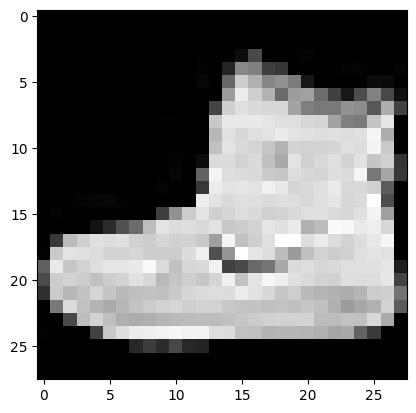

In [143]:
plt.imshow(image.squeeze(),  cmap='gray') # map you have to define in which you want to see.
print('label:', label)

In [147]:
batch = next(iter(train_loader))
len(batch), type(batch) # len of batch is 2 beacuse we have a tuple of image set and corresponding label.

(2, list)

In [145]:
images, labels = batch # you have separated image set of 32 and corresponding labels in 2 different variables.

In [148]:
images.shape, labels.shape # image shape gives you 32 images of size 1*28*28 and labels shape will give you size of 32

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

labels: tensor([6, 2, 1, 4, 3, 8, 9, 1, 6, 1, 6, 6, 6, 0, 4, 6, 0, 3, 0, 6, 2, 4, 6, 1, 1, 3, 4, 4, 1, 5, 1, 0])


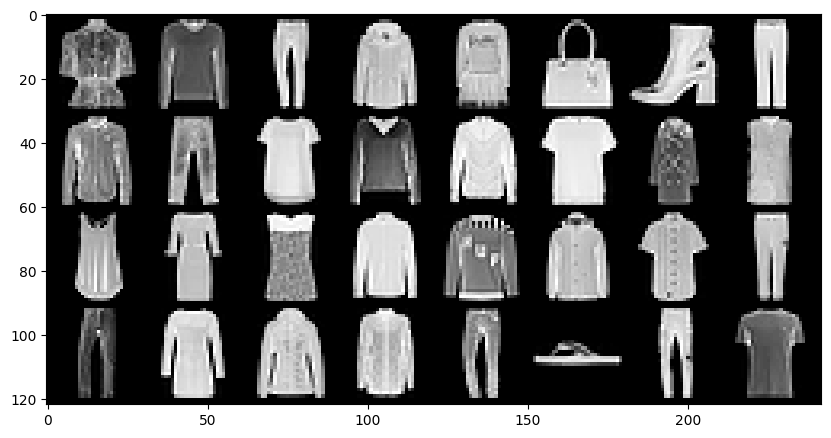

In [149]:
# PyTorch gives us grid to show images, use it to show neatly a below.
grid = torchvision.utils.make_grid(images,  nrow=8)
plt.figure(figsize=(10,10))
plt.imshow(np.transpose(grid, (1,2,0))) # this arg is height width and batch.
print('labels:', labels)

# how to build a model

In [150]:
import torch.nn as nn

In [151]:
class Network(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer = None

  def forward(self, t):
    t = self.layer(t)
    return t

In [152]:
import torch
import torchvision # provide access to datasets, models, transforms, utils, etc
import torchvision.transforms as transforms

In [153]:
from torch.utils.data import Dataset

# Dataset is there to be able to interact with DataLoader

class MyDataset(Dataset):
  def __init__(self):
    self.data = (
        "This was an amazing product",
        "This was the shittiest product possible",
        "Amazing product, fast delivery",
        "Had to sell my kidney to buy this, and now my life has changed",
        "Good one!",
        "Bad One!"
    )

  def __getitem__(self, index):
    return self.data[index]

  def __len__(self):
    return len(self.data)

myData = MyDataset()

for m in myData:
  print(m)

This was an amazing product
This was the shittiest product possible
Amazing product, fast delivery
Had to sell my kidney to buy this, and now my life has changed
Good one!
Bad One!


In [154]:
train_loader = torch.utils.data.DataLoader(myData, batch_size = 2, shuffle=True)

In [156]:
for tr in train_loader: # getting 2 images at the same time.
  print(tr)

['Good one!', 'This was an amazing product']
['Bad One!', 'Amazing product, fast delivery']
['This was the shittiest product possible', 'Had to sell my kidney to buy this, and now my life has changed']


In [157]:
train_set = torchvision.datasets.FashionMNIST(
    root='./data',
    train=True,
    download=True,
    transform = transforms.Compose([
          transforms.ToTensor()
    ])
)

In [158]:
import torch.nn as nn

class Network(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer = None

  def forward(self, t):
    t = self.layer(t)
    return t

In [160]:
class Network(nn.Module):
  def __init__(self):
    super().__init__()

    # input 28 # output 24 # receptive_field = 5
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5) 
    # input 24 # output 20 # receptive_field = 9
    self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
    # input 12x20x20, output 120
    # input 10*512
    self.fc1 = nn.Linear(in_features=12*20*20, out_features=120)
    self.fc2 = nn.Linear(in_features=120, out_features=60)
    self.out = nn.Linear(in_features=60, out_features=10)
  
  def forward(self, t):
    return t


In [161]:
network = Network()

print(network)

Network(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=4800, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)


In [163]:
network.fc2

Linear(in_features=120, out_features=60, bias=True)

In [164]:
dir(network.fc2)

['T_destination',
 '__annotations__',
 '__call__',
 '__class__',
 '__constants__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_apply',
 '_backward_hooks',
 '_backward_pre_hooks',
 '_buffers',
 '_call_impl',
 '_forward_hooks',
 '_forward_hooks_with_kwargs',
 '_forward_pre_hooks',
 '_forward_pre_hooks_with_kwargs',
 '_get_backward_hooks',
 '_get_backward_pre_hooks',
 '_get_name',
 '_is_full_backward_hook',
 '_load_from_state_dict',
 '_load_state_dict_post_hooks',
 '_load_state_dict_pre_hooks',
 '_maybe_warn_non_full_backward_hook',
 '_modules',
 '_named_members',
 '_non_persistent_buffers_set',
 '_parameters',
 '_register_load_st

In [165]:
network.fc2.weight

Parameter containing:
tensor([[-0.0104,  0.0611, -0.0355,  ..., -0.0567, -0.0772,  0.0798],
        [-0.0036, -0.0282,  0.0005,  ...,  0.0160,  0.0486,  0.0810],
        [ 0.0550, -0.0320,  0.0649,  ...,  0.0369,  0.0909,  0.0379],
        ...,
        [ 0.0757,  0.0654,  0.0671,  ..., -0.0634,  0.0048, -0.0372],
        [-0.0053,  0.0903,  0.0196,  ...,  0.0728, -0.0119, -0.0194],
        [ 0.0522,  0.0451, -0.0003,  ..., -0.0675, -0.0058,  0.0546]], requires_grad=True)

In [166]:
network.fc2.weight.shape

torch.Size([60, 120])

In [167]:
class Network(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5) 
    self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
    self.fc1 = nn.Linear(in_features=12*20*20, out_features=120)
    self.fc2 = nn.Linear(in_features=120, out_features=60)
    self.out = nn.Linear(in_features=60, out_features=10)
  
  def forward(self, t):
    # TODO implement this
    return t

network = Network()

for name, param in network.named_parameters():
  print(name, '\t\t', param.shape)

conv1.weight 		 torch.Size([6, 1, 5, 5])
conv1.bias 		 torch.Size([6])
conv2.weight 		 torch.Size([12, 6, 5, 5])
conv2.bias 		 torch.Size([12])
fc1.weight 		 torch.Size([120, 4800])
fc1.bias 		 torch.Size([120])
fc2.weight 		 torch.Size([60, 120])
fc2.bias 		 torch.Size([60])
out.weight 		 torch.Size([10, 60])
out.bias 		 torch.Size([10])


In [168]:
import torch.nn.functional as F

In [170]:
class Network(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5) 
    self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
    self.fc1 = nn.Linear(in_features=12 * 4 * 4, out_features=120)
    self.fc2 = nn.Linear(in_features=120, out_features=60)
    self.out = nn.Linear(in_features=60, out_features=10)
  
  def forward(self, t):
    # input layer
    x = t

    # conv1 layer
    x = self.conv1(x)
    x = F.relu(x)
    x = F.max_pool2d(x, kernel_size=2, stride=2) # 28 | 24 | 12

    # conv2 layer
    x = self.conv2(x)
    x = F.relu(x)
    x = F.max_pool2d(x, kernel_size=2, stride=2) # 12 | 8 | 4 >> 12x4x4

    # reshapre
    x = x.reshape(-1, 12 * 4 * 4)

    # fc1 layer
    x = self.fc1(x)
    x = F.relu(x)

    # fc2 layer
    x = self.fc2(x)
    x = F.relu(x)

    # output layer
    x = self.out(x)
    # x = F.softmax(x, dim=1)
    return x

In [171]:
torch.set_grad_enabled(False)

In [172]:
sample = next(iter(train_set)) 
image, label = sample
image.shape, image.shape

(torch.Size([1, 28, 28]), torch.Size([1, 28, 28]))

In [173]:
network = Network()

In [175]:
pred = network(image)

In [176]:
pred, pred.shape, label

(tensor([[ 0.0010, -0.2073, -0.0626,  0.1130,  0.0371,  0.1079, -0.0144, -0.1023, -0.0202, -0.0099]]),
 torch.Size([1, 10]),
 9)

In [177]:
pred.argmax(dim=1) # this code helps us in predicting what class not tensor as an output

tensor([3])

In [178]:
F.softmax(pred, dim=1).sum()

tensor(1.)

In [180]:
F.softmax(pred, dim=1) # modifies all the values still the output what model predicting is the highest.

tensor([[0.1013, 0.0822, 0.0950, 0.1133, 0.1050, 0.1127, 0.0997, 0.0913, 0.0992, 0.1002]])

In [181]:
data_loader = torch.utils.data.DataLoader(
    train_set, 
    batch_size=10
)

In [182]:
batch = next(iter(data_loader))
len(batch[0])

10

In [183]:
images, labels = batch

preds = network(images)
preds.shape

torch.Size([10, 10])

In [184]:
preds

tensor([[ 0.0010, -0.2073, -0.0626,  0.1130,  0.0371,  0.1079, -0.0144, -0.1023, -0.0202, -0.0099],
        [-0.0069, -0.2034, -0.0639,  0.1076,  0.0398,  0.1099, -0.0159, -0.1022, -0.0175, -0.0130],
        [-0.0082, -0.1986, -0.0712,  0.1118,  0.0378,  0.1074, -0.0155, -0.1013, -0.0067,  0.0025],
        [-0.0056, -0.1994, -0.0716,  0.1110,  0.0358,  0.1093, -0.0134, -0.1005, -0.0086, -0.0028],
        [-0.0053, -0.2023, -0.0651,  0.1118,  0.0359,  0.1037, -0.0119, -0.1033, -0.0080,  0.0003],
        [-0.0066, -0.2096, -0.0701,  0.1128,  0.0402,  0.1034, -0.0052, -0.1018, -0.0171, -0.0116],
        [-0.0028, -0.2000, -0.0688,  0.1097,  0.0394,  0.1104, -0.0164, -0.0967, -0.0166, -0.0062],
        [-0.0054, -0.2111, -0.0658,  0.1156,  0.0433,  0.0969, -0.0090, -0.1030, -0.0271, -0.0117],
        [ 0.0005, -0.1907, -0.0754,  0.1098,  0.0352,  0.1143, -0.0114, -0.0970, -0.0149, -0.0016],
        [ 0.0029, -0.1976, -0.0702,  0.1148,  0.0299,  0.1147, -0.0107, -0.0995, -0.0184, -0.0045]])

In [185]:
preds.argmax(dim=1)

tensor([3, 5, 3, 3, 3, 3, 5, 3, 5, 3])

In [188]:
preds.argmax(dim=1).eq(labels).sum().item() # with this statement I can check whether pred output is matching with labels and then sum it. NOw once you run item() it will you the count.

2

In [189]:
def get_num_correct(preds, labels):
  return preds.argmax(dim=1).eq(labels).sum().item()

In [190]:
get_num_correct(preds, labels)

2

In [191]:
import torch.optim as optim

#enabling back propagation
torch.set_grad_enabled(True)

In [192]:
preds = network(images)
loss = F.cross_entropy(preds, labels) # cross entropy is one of the loss function.
loss.item()

2.2836427688598633

In [194]:
print(network.conv1.weight.grad) # no gradients stored with weights of con1 in the network

None


In [195]:
loss.backward()

In [198]:
print(network.conv1.weight.grad) # gradients are now stored within weights

tensor([[[[ 1.8576e-03,  1.2150e-03,  7.0902e-04,  2.1142e-04, -1.5668e-04],
          [ 2.3853e-03,  1.1009e-03,  1.4634e-03,  9.8741e-04,  1.7645e-04],
          [ 1.6539e-03,  1.5063e-03,  2.6662e-03,  1.5343e-03,  1.1585e-03],
          [ 7.7187e-04,  1.4913e-03,  1.8674e-03,  3.1601e-04,  8.6308e-04],
          [ 2.0228e-03,  1.9919e-03,  1.7203e-03,  1.0392e-03,  1.5166e-03]]],


        [[[ 2.0428e-03,  8.7815e-04,  1.4240e-03,  2.3154e-03,  3.0426e-03],
          [ 1.2713e-03,  1.5858e-03,  9.7590e-04,  2.2617e-03,  2.4348e-03],
          [ 2.1156e-03,  2.9339e-03,  2.5171e-03,  3.3308e-03,  2.6882e-03],
          [ 2.0586e-03,  2.1444e-03,  8.2065e-04,  1.6374e-03,  3.0068e-03],
          [ 1.7026e-03,  2.1103e-03,  1.3469e-03,  2.3463e-03,  2.8969e-03]]],


        [[[-1.3001e-03, -2.7837e-03, -3.2480e-03, -2.1325e-03, -1.9467e-03],
          [-2.4369e-03, -4.3306e-03, -3.9907e-03, -2.7595e-03, -1.9442e-03],
          [-3.1802e-03, -4.5511e-03, -3.8790e-03, -2.8011e-03, -2.12

In [199]:
print(network.conv1.weight.grad.shape)

torch.Size([6, 1, 5, 5])


In [200]:
optimizer = optim.SGD(network.parameters(), lr = 0.01)

In [201]:
loss.item(), get_num_correct(preds, labels)

(2.2836427688598633, 2)

In [202]:
optimizer.step() # updated the weights after this step

In [203]:
loss = F.cross_entropy(preds, labels)
loss.item(), get_num_correct(preds, labels)

(2.2836427688598633, 2)

In [206]:
loss.backward()

RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

In [207]:
optimizer.step()
preds = network(images)
loss = F.cross_entropy(preds, labels)
loss.item(), get_num_correct(preds, labels)

(2.2805185317993164, 2)

In [208]:
loss.backward()

In [209]:
optimizer.step()
preds = network(images)
loss = F.cross_entropy(preds, labels)
loss.item(), get_num_correct(preds, labels)

(2.277388572692871, 2)

In [210]:
loss.backward()

In [211]:
optimizer.step()
preds = network(images)
loss = F.cross_entropy(preds, labels)
loss.item(), get_num_correct(preds, labels)

(2.2727150917053223, 2)

In [212]:
loss.backward()
optimizer.step()
preds = network(images)
loss = F.cross_entropy(preds, labels)
loss.item(), get_num_correct(preds, labels)

(2.2665514945983887, 2)

In [213]:
loss.backward()
optimizer.step()
preds = network(images)
loss = F.cross_entropy(preds, labels)
loss.item(), get_num_correct(preds, labels)

(2.2590441703796387, 2)

In [214]:
loss.backward()
optimizer.step()
preds = network(images)
loss = F.cross_entropy(preds, labels)
loss.item(), get_num_correct(preds, labels)

(2.2501819133758545, 2)

In [215]:
# lets put above thing in a loop

In [217]:
network = Network()

train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
optimizer = optim.Adam(network.parameters(), lr=0.01)

batch = next(iter(train_loader)) # Get Batch
images, labels = batch

preds = network(images) # Pass Batch
loss = F.cross_entropy(preds, labels) # Calculate Loss

loss.backward() # Calculate Gradients
optimizer.step() # Update Weights

print('loss1:', loss.item())
preds = network(images)
loss = F.cross_entropy(preds, labels)
print('loss2:', loss.item())

loss1: 2.302478551864624
loss2: 2.284086227416992


In [218]:
network = Network()

train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
optimizer = optim.Adam(network.parameters(), lr=0.01)

total_loss = 0
total_correct = 0

for batch in train_loader: # Get Batch
    images, labels = batch 

    preds = network(images) # Pass Batch
    loss = F.cross_entropy(preds, labels) # Calculate Loss

    optimizer.zero_grad()
    loss.backward() # Calculate Gradients
    optimizer.step() # Update Weights

    total_loss += loss.item()
    total_correct += get_num_correct(preds, labels)

print(
    "epoch:", 0, 
    "total_correct:", total_correct, 
    "loss:", total_loss
)

epoch: 0 total_correct: 46912 loss: 344.83798560500145


In [219]:
#now epoch as well so that all the images we can train.

train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
optimizer = optim.Adam(network.parameters(), lr=0.01)

for epoch in range(10):

    total_loss = 0
    total_correct = 0

    for batch in train_loader: # Get Batch
        images, labels = batch 

        preds = network(images) # Pass Batch
        loss = F.cross_entropy(preds, labels) # Calculate Loss

        optimizer.zero_grad()
        loss.backward() # Calculate Gradients
        optimizer.step() # Update Weights

        total_loss += loss.item()
        total_correct += get_num_correct(preds, labels)

    print(
        "epoch", epoch, 
        "total_correct:", total_correct, 
        "loss:", total_loss
    )

epoch 0 total_correct: 51215 loss: 236.12456038594246
epoch 1 total_correct: 52117 loss: 214.0460177809
epoch 2 total_correct: 52477 loss: 204.37946020066738
epoch 3 total_correct: 52697 loss: 198.81150391697884
epoch 4 total_correct: 52867 loss: 193.06900089979172
epoch 5 total_correct: 53035 loss: 190.41075667738914
epoch 6 total_correct: 53159 loss: 186.81390061974525
epoch 7 total_correct: 53223 loss: 185.7625480145216
epoch 8 total_correct: 53334 loss: 181.81128530204296
epoch 9 total_correct: 53300 loss: 181.27715832740068
